In [1]:
# Gerekli kütüphaneleri yükleyelim
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:

# Veri kümesini yükleyelim
data = pd.read_csv('Fraud.csv')  # Kendi veri kümenizi yükleyin

# Özellikler ve hedef değişkeni ayıralım
X = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]  # Özellikler
y = data['isFraud']  # Hedef değişken


In [3]:
# 1. Veri ön işleme: Özellikleri ölçeklendiriyoruz (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [4]:
# 2. Boyut indirgeme (PCA ile)
pca = PCA(n_components=3)  # PCA ile 3 ana bileşene indirgeme
X_scaled_pca = pca.fit_transform(X_scaled)
print(f"Orijinal Özellik Sayısı: {X.shape[1]}, PCA ile Azaltılmış Özellik Sayısı: {X_scaled_pca.shape[1]}")

# Eğitim ve test seti olarak bölelim
X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.2, random_state=42)



Orijinal Özellik Sayısı: 6, PCA ile Azaltılmış Özellik Sayısı: 3


In [5]:
# 3. KNN modelini tanımlayalım (k=5 varsayılan olarak seçilmiştir)
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', n_jobs=-1)  # Paralel işlem için n_jobs=-1



In [6]:
# 4. Modeli eğitelim
knn_model.fit(X_train, y_train)



KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1)

In [7]:
# 5. Test verileriyle tahminlerde bulunalım
y_pred = knn_model.predict(X_test)



In [8]:
# 6. Performans metriklerini hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Performans metriklerini yazdıralım
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Duyarlılık (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")



Doğruluk (Accuracy): 0.9989
Kesinlik (Precision): 0.7500
Duyarlılık (Recall): 0.2056
F1 Skoru: 0.3227



Karışıklık Matrisi:
 [[1270793     111]
 [   1287     333]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.75      0.21      0.32      1620

    accuracy                           1.00   1272524
   macro avg       0.87      0.60      0.66   1272524
weighted avg       1.00      1.00      1.00   1272524



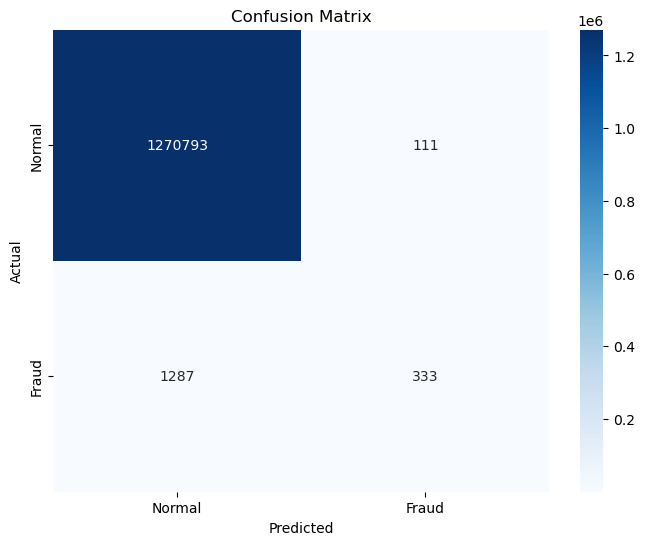

In [9]:
# 7. Karışıklık Matrisi
print("\nKarışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))

# 8. Ayrıntılı sınıflandırma raporu
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

# 9. Karışıklık Matrisini Görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



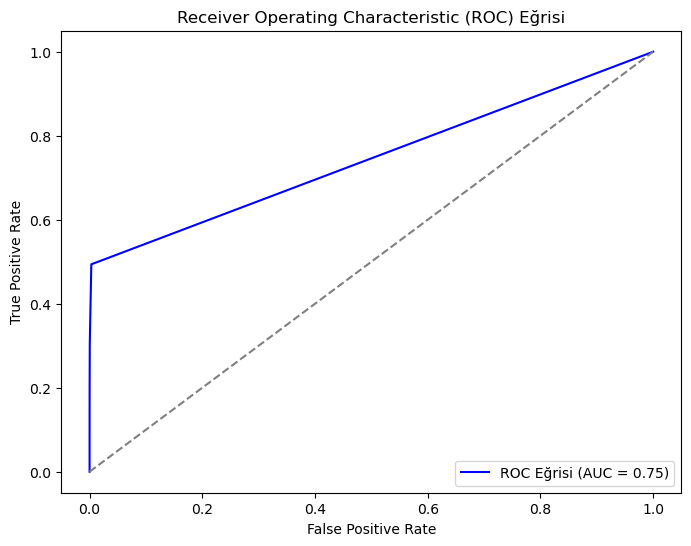

In [10]:
# 10. ROC Eğrisini Görselleştirme
y_prob = knn_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıklarını alalım
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Eğrisi (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Eğrisi')
plt.legend(loc='lower right')
plt.show()



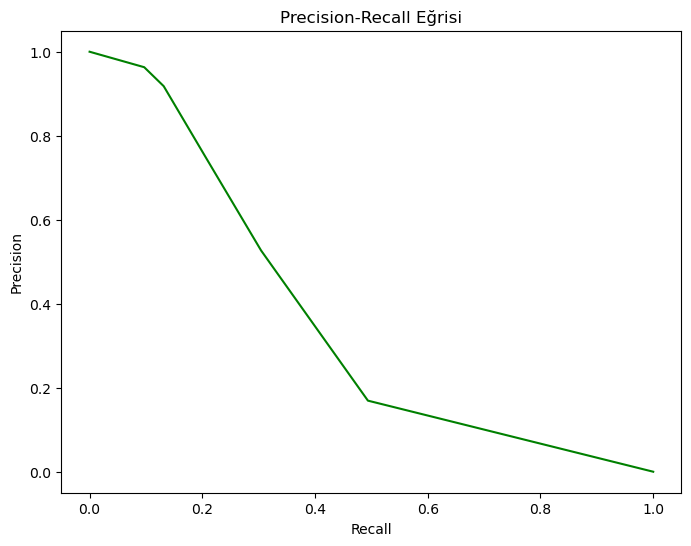

In [11]:
# 11. Precision-Recall Eğrisini Görselleştirme
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Eğrisi')
plt.show()
